In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('bank.csv')

# Preview dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [ ]:
# Encode categorical variables
df_encoded = df.copy()

le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

In [10]:
X = df_encoded.drop('deposit', axis=1)  # Features
y = df_encoded['deposit']               # Target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = dt_model.predict(X_test)

In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8051948051948052

In [15]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1166
           1       0.76      0.87      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.80      2233



In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[867, 299],
       [136, 931]])

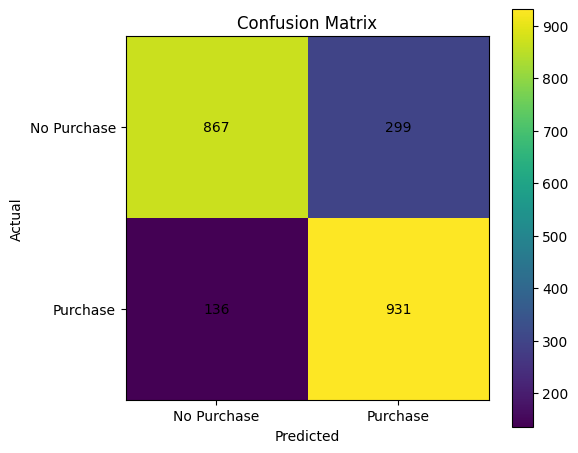

In [18]:
plt.figure(figsize=(6,5))
plt.imshow(conf_matrix)
plt.title('Confusion Matrix')
plt.colorbar()

plt.xticks([0,1], ['No Purchase', 'Purchase'])
plt.yticks([0,1], ['No Purchase', 'Purchase'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [19]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

duration    0.595239
contact     0.121729
pdays       0.084299
housing     0.067469
month       0.054023
poutcome    0.044967
previous    0.013804
age         0.010691
balance     0.003250
campaign    0.002447
dtype: float64

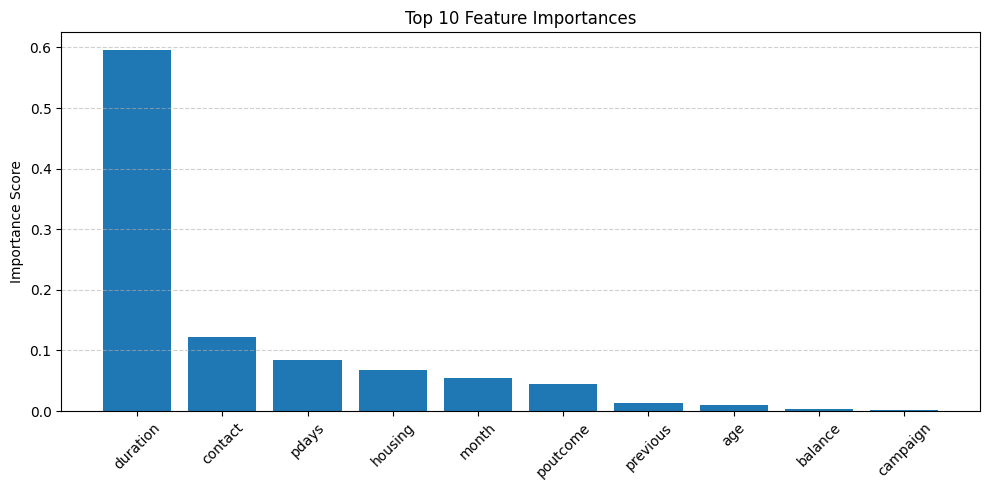

In [20]:
plt.figure(figsize=(10,5))
plt.bar(feature_importance.index[:10], feature_importance.values[:10])
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.ylabel('Importance Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [27]:

# Predict Purchase for a New Customer

def predict_purchase(input_data):
    """
    input_data: dictionary with feature names as keys
    """
    input_df = pd.DataFrame([input_data])
    
    # Encode categorical variables using same approach
    for column in input_df.select_dtypes(include='object').columns:
        input_df[column] = le.fit_transform(input_df[column])
    
    prediction = dt_model.predict(input_df)[0]
    
    if prediction == 1:
        return "Customer is likely to purchase the product."
    else:
        return "Customer is not likely to purchase the product."

In [28]:
sample_customer = {
    'age': 35,
    'job': 'admin.',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1500,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'may',
    'duration': 300,
    'campaign': 2,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown'
}

predict_purchase(sample_customer)

'Customer is likely to purchase the product.'